최소 오차의 총합
0.7719355448744554
0.6704107242125235
-0.5098652059814646
-84.16223475320115
best_error_sum
[array([50.]), array([50.]), array([50.]), array([50.]), array([50.]), array([40.44031348]), array([91.25949817]), array([24.05412131]), array([87.33845289]), array([50.]), array([50.]), array([50.]), array([50.]), array([54.38875883]), array([87.28498243]), array([74.91801503]), array([50.]), array([50.]), array([50.]), array([42.30075598]), array([50.]), array([22.13220973]), array([56.7484919]), array([50.]), array([74.54635141]), array([50.67245609]), array([73.87743404]), array([49.93479399]), array([50.]), array([50.]), array([50.]), array([50.]), array([50.]), array([50.]), array([36.49797457]), array([50.]), array([50.]), array([19.62413762]), array([50.]), array([50.]), array([49.99999998]), array([50.]), array([50.]), array([34.44909313]), array([50.]), array([50.]), array([50.]), array([50.]), array([50.]), array([49.99999972]), array([8.86482696]), array([50.]), array([50.]

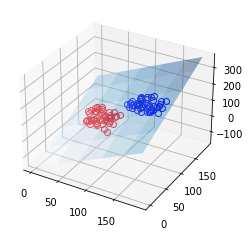

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import random
import math

population_number = 70
# 첫 세대의 가중치를 랜덤으로 생성하고, 배열로 반환.
def random_weight_list():
    weight_list = list() # 리스트 선언
    for i in range(population_number):
        weight_list.append(random.uniform(-1,1)) # uniform 함수 이용해 랜덤으로 값 추가.
    return weight_list

# 첫 세대의 bias 를 랜덤으로 생성하고, 배열로 반환.
def random_bias_list():
    bias_list = list()
    for i in range(population_number):
        bias_list.append(random.uniform(-100,100)) # uniform 함수 이용해 랜덤으로 값 추가.
    return bias_list

# sigmoid 함수
def sigmoid(x):
    # math.exp(x) = e^x 와 같다.
    y = 1 / (1 + math.exp(-x))
    return y

# zeta 함수 값을 sigmoid 처리한 label 들을 반환하는 함수
def sigmoid_list(zeta_list):
    y = np.zeros((len(zeta_list), 1))  # 행렬 생성
    # zeta_list 의 개별 원소를 sigmoid 함수에 넣어서, y에 값 넣기
    for i in range(0, len(zeta_list)):
        y[i] = sigmoid(zeta_list[i])
        # y 반환
    return y

# zeta 함수
def zeta(w1, w2, w3, x1, x2, x3, b):
    z = np.zeros((100, 1))

    for i in range(100):
        z[i] = w1*x1[i] + w2*x2[i] + w3*x3[i] + b
    return z



# 출력해주는 함수
def visualize_grid(x_0, y_0, z_0, x_1, y_1, z_1, w1, w2, w3, b):
    ax.plot(x_0, y_0, z_0, linestyle="none", marker="o", mfc="none", markeredgecolor="r")  # 샘플 출력
    ax.plot(x_1, y_1, z_1, linestyle="none", marker="o", mfc="none", markeredgecolor="b")  # 샘플 출력

    X = np.arange(0, 2, 0.1) * 100
    Y = np.arange(0, 2, 0.1) * 100
    X, Y = np.meshgrid(X, Y)

    Z = (-float(w1) / w3 * X) + (-float(w2) / w3 * Y) - float(b) / w3  # 평면의 방정식

    ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.4, cmap=cm.Blues)  # 평면 출력
    plt.show()

data = pd.read_csv("p1_training_data.csv") # 데이터 읽기
np_data = np.array(data) # np Array 로 변경

fig = plt.figure() # 새로운 figure 생성
ax = fig.add_subplot(111, projection='3d')

## positive samples
x_1 = np_data[0:50,0]
y_1 = np_data[0:50,1]
z_1 = np_data[0:50,2]

## negative samples
x_0 = np_data[50:,0]
y_0 = np_data[50:,1]
z_0 = np_data[50:,2]

# 전체 data
x1 = np_data[0:,0]
x2 = np_data[0:,1]
x3 = np_data[0:,2]
label = np_data[0:,3]
## Generation 1의 fittest gene
w1 = 0.28645574
w2 = -0.43628723
w3 = 0.30481866
b = -14.39337271

# numpy 배열로 변경
w1_population = np.array(random_weight_list())
w2_population = np.array(random_weight_list())
w3_population = np.array(random_weight_list())
b_population = np.array(random_bias_list())

# index별로 fitness를 저장.
error_sum_list = list()
fitness_ratio_min = 99999999
fitness_ratio_min_idx = -1 # fitness ratio 가 최대인 index
# population 중 한 녀석씩 봄.
for learn_idx in range(population_number):
    # zeta 함수와 sigmoid 함수 이용해, 인공신경망이 산출해 낸 label 값 가져옴.
    zeta_list = zeta(w1_population[learn_idx], w2_population[learn_idx], w3_population[learn_idx], x1, x2, x3, b_population[learn_idx])
    learning_label_list = sigmoid_list(zeta_list)
    # fitness 검사과정
    error_sum = 0
    for fit_ldx in range(0, 100):
        error_sum += pow(learning_label_list[fit_ldx] - label[fit_ldx], 2);
    error_sum_list.append(error_sum)

for i in range(population_number):
    if fitness_ratio_min > error_sum_list[i]:
        fitness_ratio_min = error_sum_list[i];
        fitness_ratio_min_idx = i

print("최소 오차의 총합")
print(w1_population[fitness_ratio_min_idx])
print(w2_population[fitness_ratio_min_idx])
print(w3_population[fitness_ratio_min_idx])
print(b_population[fitness_ratio_min_idx])
print("best_error_sum")
print(error_sum_list)
print(error_sum_list[fitness_ratio_min_idx])

visualize_grid(x_0, y_0, z_0, x_1, y_1, z_1, w1_population[fitness_ratio_min_idx], w2_population[fitness_ratio_min_idx], w3_population[fitness_ratio_min_idx], b_population[fitness_ratio_min_idx])
visualize_grid(x_0, y_0, z_0, x_1, y_1, z_1, w1_population[fitness_ratio_min_idx], w2_population[fitness_ratio_min_idx], w3_population[fitness_ratio_min_idx], b_population[fitness_ratio_min_idx])


In [ ]:
vis